In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Veri setini yükle
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv')

# Verinin ilk birkaç satırını görüntüle
df.head()

# Veri setinin genel istatistiksel bilgileri
print(df.describe())

# Eksik verilerin kontrolü
print(df.isnull().sum())

## https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

          Timestamp          Open          High           Low         Close  \
count  6.684280e+06  6.684281e+06  6.684281e+06  6.684281e+06  6.684281e+06   
mean   1.525963e+09  1.403248e+04  1.403862e+04  1.402615e+04  1.403251e+04   
std    1.157894e+08  1.881252e+04  1.881997e+04  1.880493e+04  1.881261e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.425687e+09  4.090200e+02  4.092000e+02  4.089300e+02  4.090100e+02   
50%    1.525962e+09  6.129670e+03  6.133000e+03  6.124910e+03  6.129690e+03   
75%    1.626237e+09  2.245100e+04  2.245900e+04  2.244500e+04  2.245000e+04   
max    1.726538e+09  7.379300e+04  7.379400e+04  7.373900e+04  7.379400e+04   

             Volume  
count  6.684281e+06  
mean   5.493583e+00  
std    2.302398e+01  
min    0.000000e+00  
25%    1.816690e-02  
50%    5.000000e-01  
75%    3.203197e+00  
max    5.853852e+03  
Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684281 entries, 0 to 6684280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 306.0 MB
None
          Timestamp          Open          High           Low         Close  \
count  6.684280e+06  6.684281e+06  6.684281e+06  6.684281e+06  6.684281e+06   
mean   1.525963e+09  1.403248e+04  1.403862e+04  1.402615e+04  1.403251e+04   
std    1.157894e+08  1.881252e+04  1.881997e+04  1.880493e+04  1.881261e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.425687e+09  4.090200e+02  4.092000e+02  4.089300e+02  4.090100e+02   
50%    1.525962e+09  6.129670e+03  6.133000e+03  6.124910e+03  6.129690e+03   
75%    1.626237e+09  2.245100e+04  2.245900e+04  2.244500e+04  2.245000e+04   
max    1.726538e+

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


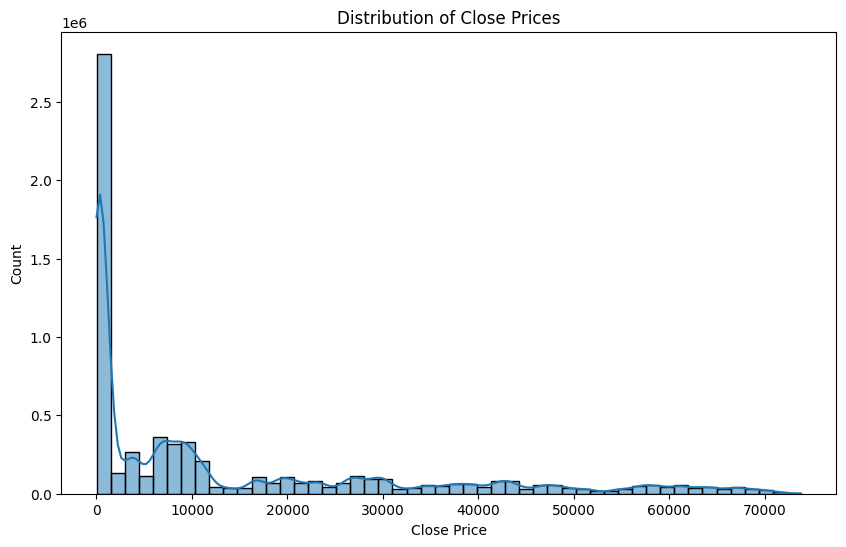

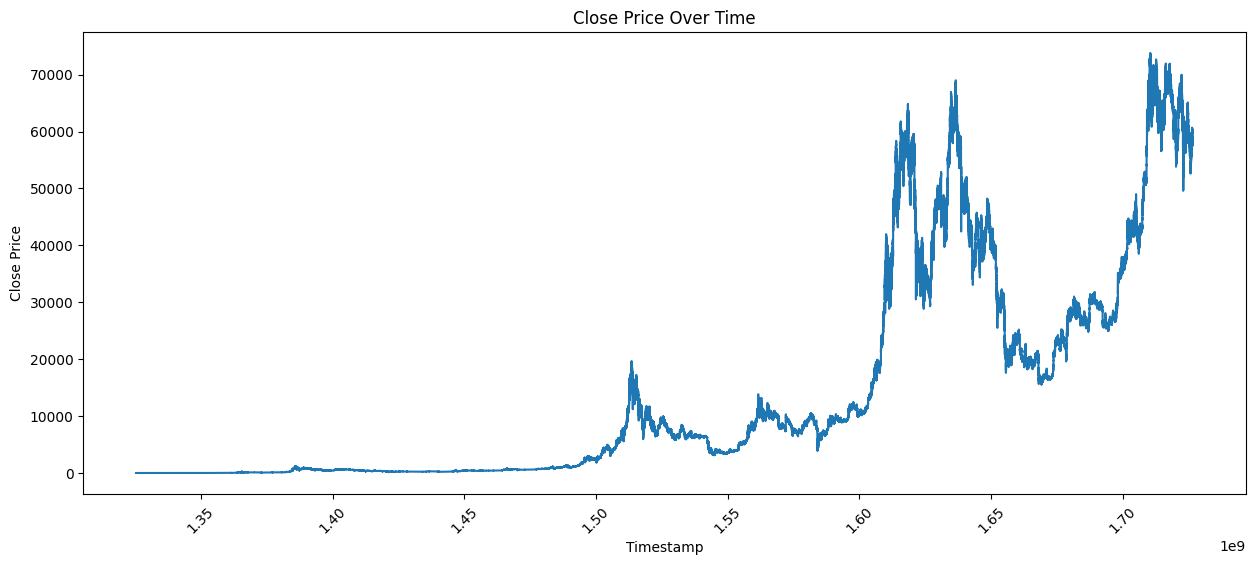

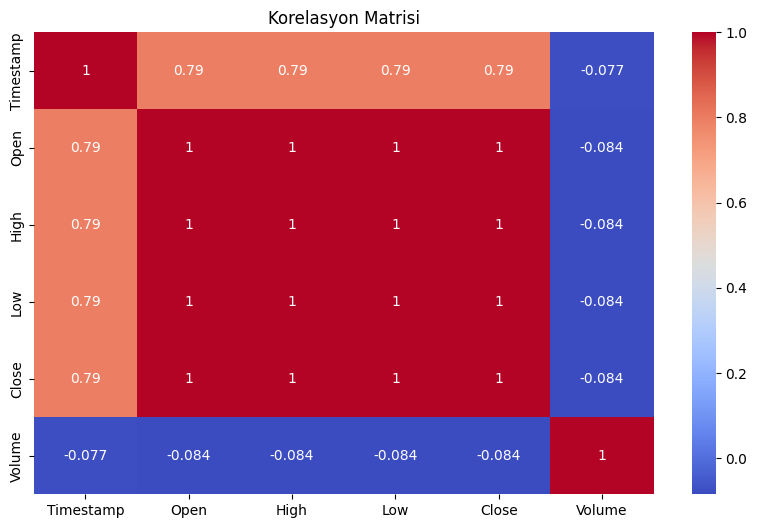

In [22]:
# Keşifsel Veri Analizi (EDA)

# Veri setinin özet bilgileri
print(df.info())
print(df.describe())

# Fiyatların dağılımını gösteren histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.xlabel('Close Price')
plt.title('Distribution of Close Prices')
plt.show()

# Kapatma fiyatlarının zamanla nasıl değiştiğini gösteren grafik
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Close'])
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.xticks(rotation=45)
plt.show()

# Korelasyon matrisi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

In [23]:
#Veri Ön İşleme

# Timestamp sütununu datetime formatına çevirme
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Eksik veri olup olmadığını kontrol et
print(df.isnull().sum())

# Eksik verileri kaldırma
df.dropna(inplace=True)

# Tarih ve zaman özelliklerini türetme
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Özellikler ve hedef değişkeni ayırma
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Hour']]
y = df['Close']

# Verinin eğitim ve test kümelerine bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin normalizasyonu (standartlaştırılması)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [24]:
#Gözetimli Öğrenme - Linear Regression
# Modelin oluşturulması
lr_model = LinearRegression()

# Modelin eğitilmesi
lr_model.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = lr_model.predict(X_test_scaled)

# Performans değerlendirmesi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 87.79264449317985
R-squared: 0.999999751878714


Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

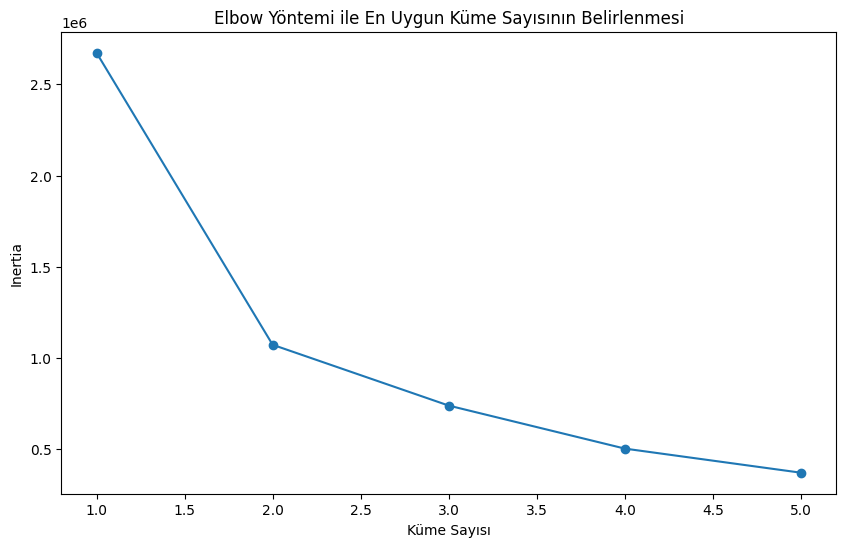

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


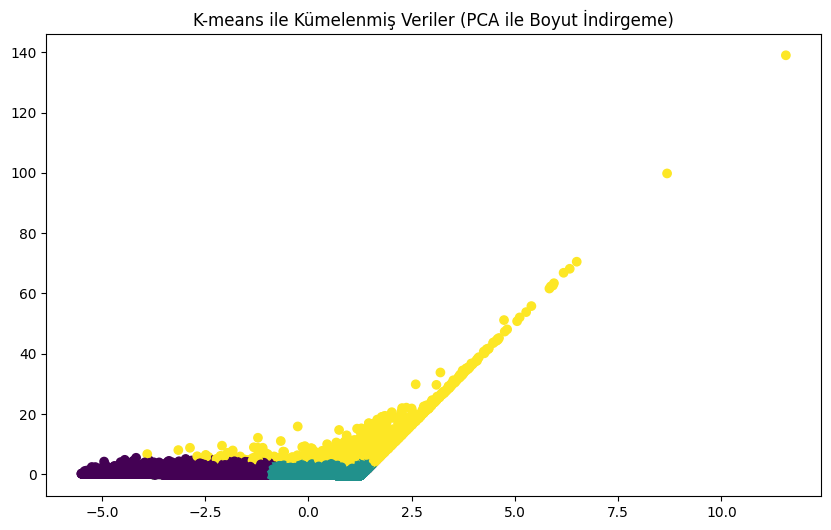

In [25]:
#Gözetimsiz Öğrenme - k-Means Kümeleme


# Veri Ön İşleme
# Timestamp sütununu datetime formatına çevirme
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Eksik veri olup olmadığını kontrol et
print(df.isnull().sum())

# Eksik verileri kaldırma
df.dropna(inplace=True)

# Tarih ve zaman özelliklerini türetme
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Özellikler ve hedef değişkeni ayırma
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Hour']]

# Verinin bir örneklemini alma (%10'unu kullanıyoruz)
df_sample = df.sample(frac=0.1, random_state=42)
X_sample = df_sample[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Hour']]

# Verilerin normalizasyonu (standartlaştırılması)
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# PCA ile boyut indirgeme (2 bileşene indiriyoruz)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample_scaled)

# K-means ile Elbow Yöntemi (dirsek noktası) - k aralığını daha küçük tutuyoruz
inertia = []
k_range = range(1, 6)  # Küme sayısı aralığını 1-5 ile sınırlandırıyoruz

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10,6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Yöntemi ile En Uygun Küme Sayısının Belirlenmesi")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")
plt.show()

# En uygun küme sayısını seçerek K-means uygulama (örneğin k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_sample['Cluster'] = kmeans.fit_predict(X_pca)

# Kümelerin görselleştirilmesi
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['Cluster'], cmap='viridis')
plt.title("K-means ile Kümelenmiş Veriler (PCA ile Boyut İndirgeme)")
plt.show()

In [28]:
#Model Değerlendirme ve Optimizasyon

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge Regression için hiperparametre optimizasyonu (alpha parametresi)
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi MSE: {-grid_search.best_score_}")

En iyi parametreler: {'alpha': 0.01}
En iyi MSE: 92.36475014852827
